WBC/RBC - Classifier

In [47]:

from tensorflow.keras.preprocessing import image_dataset_from_directory



data_train = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClassifier/Testlauf1',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=64,
                                        image_size=(150,150),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.3,
                                        subset='training')
data_train


Found 42667 files belonging to 2 classes.
Using 29867 files for training.


<BatchDataset shapes: ((None, 150, 150, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [48]:
data_val = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClassifier/Testlauf1',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=64,
                                        image_size=(150,150),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.2,
                                        subset='validation')
data_val

Found 42667 files belonging to 2 classes.
Using 8533 files for validation.


<BatchDataset shapes: ((None, 150, 150, 3), (None, 1)), types: (tf.float32, tf.float32)>

AttributeError: 'BatchDataset' object has no attribute 'head'

In [51]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = models.Sequential()
model.add(Rescaling(1./255, input_shape=(150,150,3)))
model.add(layers.Conv2D(6, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(12, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 148, 148, 6)       168       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 6)         0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 74, 74, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 12)        660       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 12)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 36, 36, 12)      

In [52]:
from tensorflow.keras import optimizers

adam = optimizers.Adam()

model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=['accuracy','Recall'])

In [53]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(data_train,
                    epochs=15,
                    callbacks=es,
                    validation_data=data_val)

Epoch 1/15
467/467 [==============================] - 86s 182ms/step - loss: 0.0209 - accuracy: 0.9978 - recall: 0.9989 - val_loss: 1.2485e-05 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 2/15
467/467 [==============================] - 84s 180ms/step - loss: 0.0102 - accuracy: 0.9998 - recall: 0.9993 - val_loss: 3.7189e-06 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 3/15
467/467 [==============================] - 84s 179ms/step - loss: 0.0086 - accuracy: 0.9998 - recall: 0.9993 - val_loss: 9.1029e-08 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 4/15
467/467 [==============================] - 84s 179ms/step - loss: 0.0074 - accuracy: 0.9997 - recall: 0.9992 - val_loss: 1.4512e-07 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 5/15
467/467 [==============================] - 84s 179ms/step - loss: 0.0061 - accuracy: 0.9996 - recall: 0.9989 - val_loss: 4.3984e-08 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 6/15
467/467 [==============================] - 84s 179ms/s

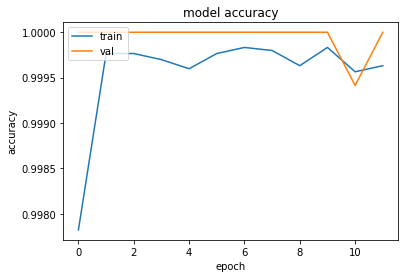

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

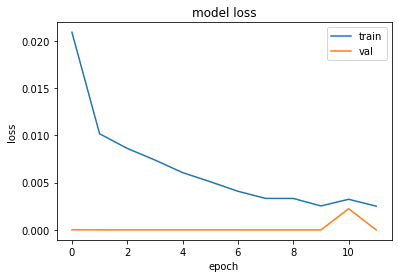

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [56]:
model.evaluate(data_val, return_dict=True)

134/134 [==============================] - 7s 50ms/step - loss: 6.3408e-10 - accuracy: 1.0000 - recall: 1.0000


{'loss': 6.340818425876193e-10, 'accuracy': 1.0, 'recall': 1.0}